# Preprocessamento dos dados 

## Instalando Biblioteca

In [13]:
# import sys
# !{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn

## Importando Biblioteca 

In [14]:
import sys
print(sys.executable)

# Ative o ambiente
!conda activate MLgraos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

/opt/anaconda3/envs/MLgraos/bin/python

CondaError: Run 'conda init' before 'conda activate'



In [27]:
import os
print(os.getcwd())

colunas = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length',
           'Kernel_Width', 'Asymmetry_Coeff', 'Groove_Length', 'Class']

df = pd.read_csv('../dados/processados/seeds_dataset.txt', delim_whitespace=True, names=colunas)
df.head()

/Users/francismaralvesmartinsjunior/Documents/GitHub/Cap3-ImplementandoalgoritmosdeMachineLearningcomScikitlearn/notebooks


/var/folders/bl/rbjcm41j0nj67db1pbfrzr6r0000gn/T/ipykernel_12429/1088099819.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../dados/processados/seeds_dataset.txt', delim_whitespace=True, names=colunas)


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [28]:
df.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Groove_Length,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [29]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Groove_Length      0
Class              0
dtype: int64

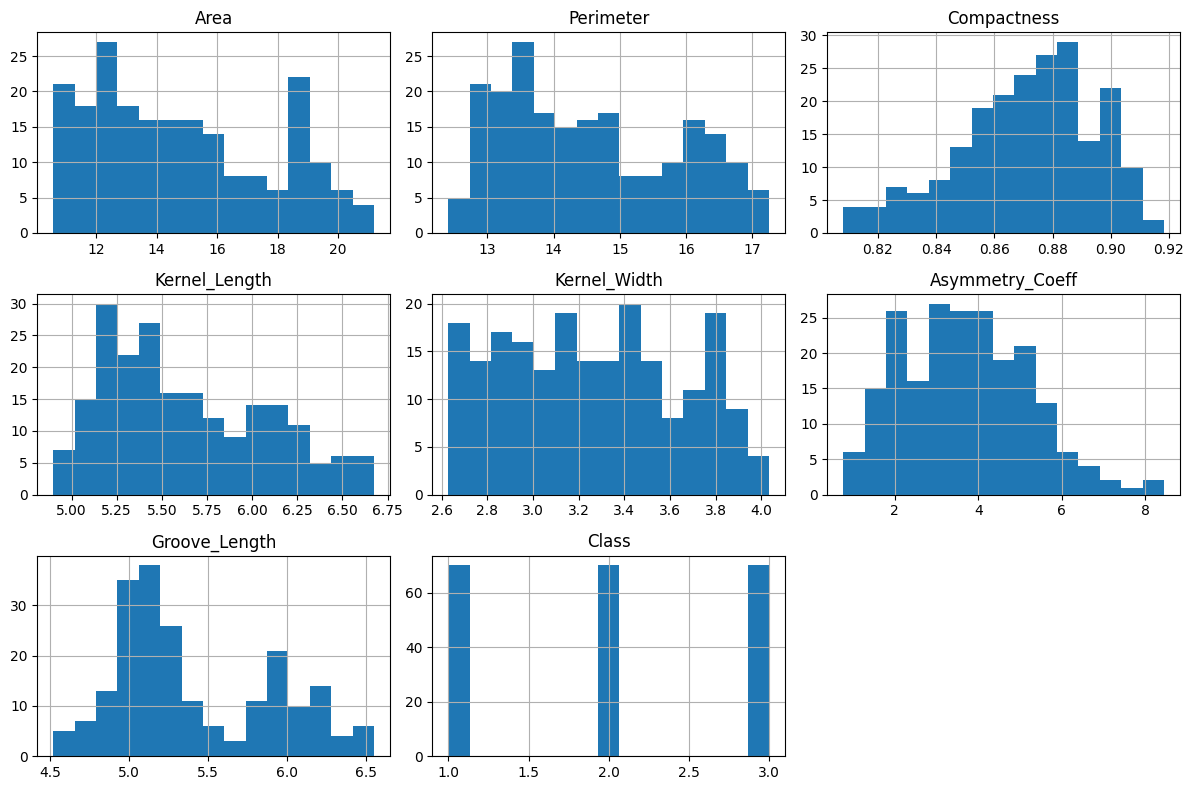

In [30]:
df.hist(figsize=(12,8), bins=15)
plt.tight_layout()
plt.show()

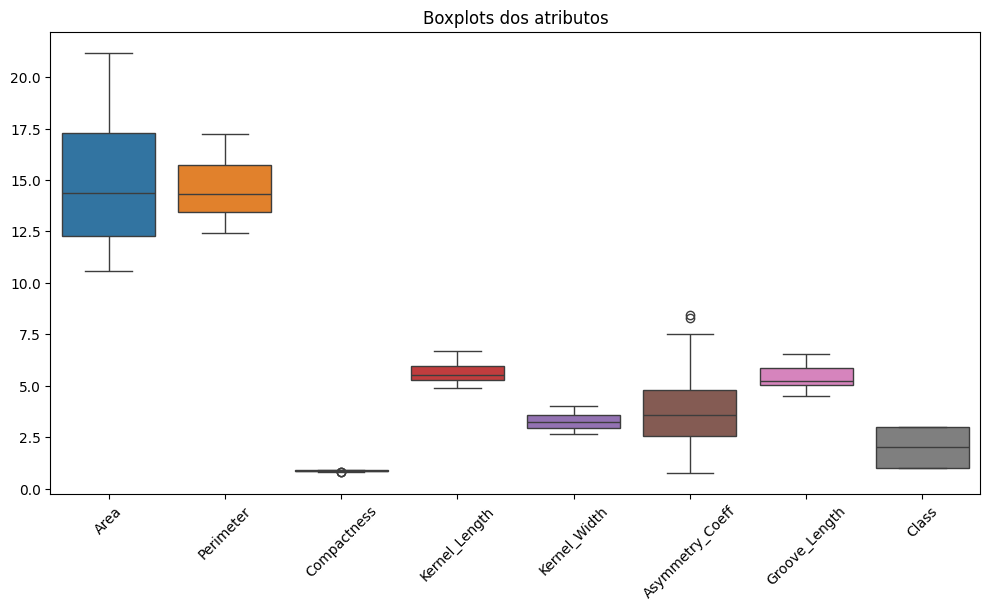

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots dos atributos")
plt.show()

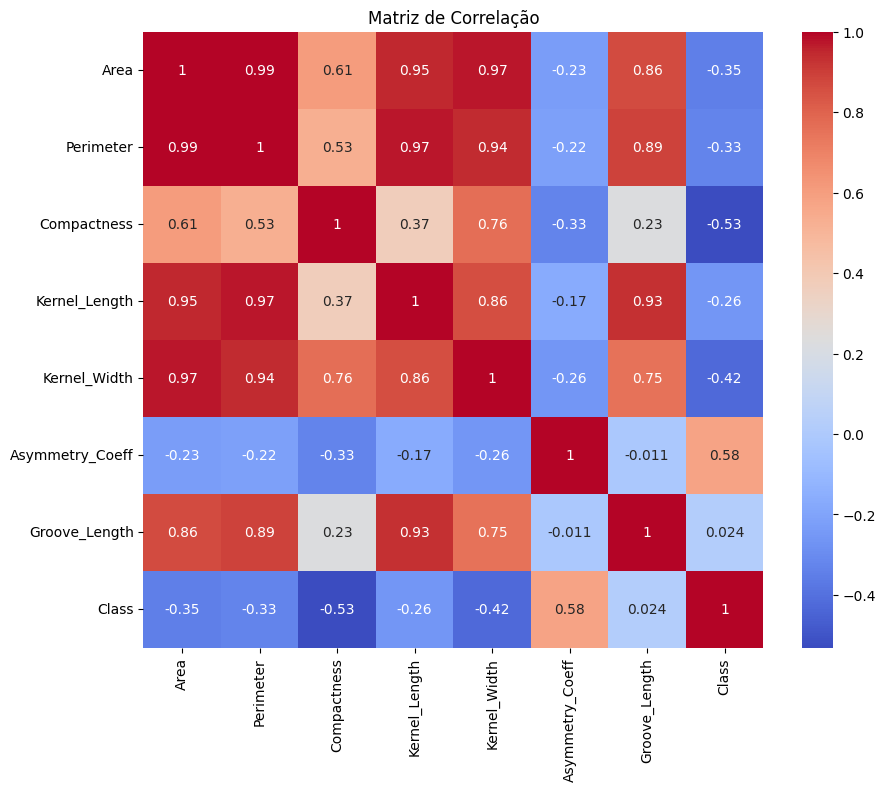

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [33]:
df['Class'].value_counts()
df['Class'] = df['Class'].replace({1: 'Kama', 2: 'Rosa', 3: 'Canadian'})

In [34]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Class'] = y.values
df_scaled.to_csv('../dados/seeds_tratado.csv', index=False)

# Salvando o dataset processado
df_scaled.to_csv('../dados/processados/seeds_dataset_processado.csv', index=False)
